In [1]:
import mplfinance as mpf
import requests
import pandas as pd
import re
import time


import plotly.graph_objects as go
import plotly.subplots as ms
import talib
import matplotlib.pyplot as plt     # 점찍기용


import matplotlib.pyplot as plt    # 히트맵용
import seaborn as sns              # 히트맵용
import numpy as np
from pandas import Series, DataFrame

In [6]:
test1 = pd.read_csv('003100.KQ.csv', encoding='cp949')    ##########
test1

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-01-02,18600.0,18750.0,18450.0,18750.0,18699.246094,6861.0
1,2018-01-03,18800.0,18800.0,18550.0,18550.0,18499.787109,3203.0
2,2018-01-04,18600.0,18800.0,18500.0,18550.0,18499.787109,4183.0
3,2018-01-05,18500.0,18650.0,18500.0,18550.0,18499.787109,8591.0
4,2018-01-08,18600.0,18650.0,18100.0,18400.0,18350.193359,7477.0
...,...,...,...,...,...,...,...
1307,2023-04-24,167700.0,169000.0,117400.0,117400.0,117400.000000,26583.0
1308,2023-04-25,82200.0,82200.0,82200.0,82200.0,82200.000000,10327.0
1309,2023-04-26,57600.0,57600.0,57600.0,57600.0,57600.000000,25214.0
1310,2023-04-27,40400.0,40400.0,40400.0,40400.0,40400.000000,389586.0


In [7]:
test1 = test1[['Date', 'Close', 'Volume']]
test1

,Date,Close,Volume
0,2018-01-02,18750.0,6861.0
1,2018-01-03,18550.0,3203.0
2,2018-01-04,18550.0,4183.0
3,2018-01-05,18550.0,8591.0
4,2018-01-08,18400.0,7477.0
...,...,...,...
1307,2023-04-24,117400.0,26583.0
1308,2023-04-25,82200.0,10327.0
1309,2023-04-26,57600.0,25214.0
1310,2023-04-27,40400.0,389586.0


In [8]:
test2 = pd.read_csv('게시글_003100.csv', encoding='cp949')    ##########
test2

,날짜,게시글
0,2017-06-22,4
1,2017-06-23,1
2,2017-06-25,1
3,2017-06-26,1
4,2017-06-27,1
...,...,...
975,2023-04-27,577
976,2023-04-28,1094
977,2023-04-29,140
978,2023-04-30,95


In [ ]:
test1.index = pd.DatetimeIndex(test1['Date'])
test2.index = pd.DatetimeIndex(test2['날짜'])

In [11]:
m = test2.join(test1)
m

,날짜,게시글,Date,Close,Volume
0,2017-06-22,4,2018-01-02,18750.0,6861.0
1,2017-06-23,1,2018-01-03,18550.0,3203.0
2,2017-06-25,1,2018-01-04,18550.0,4183.0
3,2017-06-26,1,2018-01-05,18550.0,8591.0
4,2017-06-27,1,2018-01-08,18400.0,7477.0
...,...,...,...,...,...
975,2023-04-27,577,2021-12-16,57900.0,46131.0
976,2023-04-28,1094,2021-12-17,58300.0,33414.0
977,2023-04-29,140,2021-12-20,58000.0,48757.0
978,2023-04-30,95,2021-12-21,57800.0,27411.0


In [ ]:
# 날짜 결측값 'NaN'

test2 = test2.resample('D').last().fillna(value = '0') ## 게시글 결측치 = 0


m = test2.join(test1)
m = m.rename(columns={'날짜': 'naver_date', '게시글': 'Post'})



m.tail(30)

In [3]:
m1 = m.tail(29)
m1

,naver_date,Post,Date,Close,Volume
날짜,,,,,
2023-04-03,2023-04-03,1.0,2023-04-03,158200.0,19141.0
2023-04-04,2023-04-04,1.0,2023-04-04,158500.0,30766.0
2023-04-05,2023-04-05,1.0,2023-04-05,158700.0,15376.0
2023-04-06,2023-04-06,2.0,2023-04-06,159600.0,27600.0
2023-04-07,2023-04-07,1.0,2023-04-07,160000.0,23258.0
2023-04-08,2023-04-08,1.0,NaN,NaN,NaN
2023-04-09,2023-04-09,1.0,NaN,NaN,NaN
2023-04-10,2023-04-10,1.0,2023-04-10,158700.0,21850.0
2023-04-11,2023-04-11,4.0,2023-04-11,159300.0,37091.0


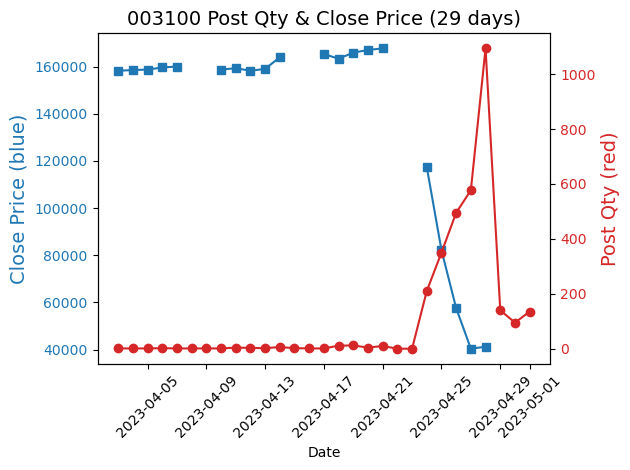

In [4]:
## plot with 2 different axes for a dataset with different scales


# left side
fig, ax1 = plt.subplots()
color_1 = 'tab:blue'
ax1.set_title('003100 Post Qty & Close Price (29 days)', fontsize=14)
ax1.set_xlabel('Date')
ax1.set_ylabel('Close Price (blue)', fontsize=14, color=color_1)

ax1.plot(m1.index, m1.Close, marker='s', color=color_1)     #####
ax1.tick_params(axis='y', labelcolor=color_1)
ax1.tick_params(axis='x', rotation=45) #####



# right side with different scale
ax2 = ax1.twinx() # instantiate a second axes that shares the same x-axis
color_2 = 'tab:red'
ax2.set_ylabel('Post Qty (red)', fontsize=14, color=color_2)

ax2.plot(m1.index, m1.Post, marker='o', color=color_2)     #####
ax2.tick_params(axis='y', labelcolor=color_2)



fig.tight_layout()

plt.show()

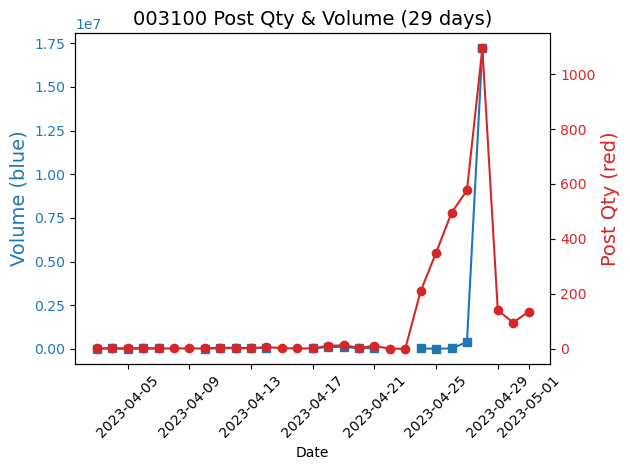

In [5]:
## plot with 2 different axes for a dataset with different scales


# left side
fig, ax1 = plt.subplots()
color_1 = 'tab:blue'
ax1.set_title('003100 Post Qty & Volume (29 days)', fontsize=14)
ax1.set_xlabel('Date')
ax1.set_ylabel('Volume (blue)', fontsize=14, color=color_1)

ax1.plot(m1.index, m1.Volume, marker='s', color=color_1)     #####
ax1.tick_params(axis='y', labelcolor=color_1)
ax1.tick_params(axis='x', rotation=45) #####


# right side with different scale
ax2 = ax1.twinx() # instantiate a second axes that shares the same x-axis
color_2 = 'tab:red'
ax2.set_ylabel('Post Qty (red)', fontsize=14, color=color_2)

ax2.plot(m1.index, m1.Post, marker='o', color=color_2)     #####
ax2.tick_params(axis='y', labelcolor=color_2)



fig.tight_layout()

plt.show()